# Model Training

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

## Models Packages 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor 
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
# from catboost import CatBoostRegressor 
# from xgboost import XGBRegressor 
import warnings 
warnings.filterwarnings('ignore') 

In [4]:
df = pd.read_csv("../data/Students_Performance.csv")

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X = df.drop(columns=["math_score"], axis=1)

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [13]:
## create Column Transformer with 3 types of transfromers 
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer 

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer( 
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [14]:
X = preprocessor.fit_transform(X)

In [15]:
X.shape

(1000, 19)

In [16]:
## seperate dataset into train and test 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [17]:
## function to evaluate model 
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted) 
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mse)
    r_square = r2_score(true, predicted)
    return mse, mae, rmse, r_square

In [18]:
## creating all models list 
models = {
    "Linear Regression": LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(), 
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor(),
    # "XGB Regressor" : XGBRegressor(),
    # "CatBoosting Regressor" : CatBoostRegressor(verbose=False),
}

In [19]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # evaluate model 
    model_train_mse, model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mse, model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Set")
    print("- Mean Squared Error: ", model_train_mse)
    print("- Mean Absolute Error: ", model_train_mae)
    print("- Root Mean Squared Error: ", model_train_rmse)
    print("- R2 Score: ", model_train_r2)
    print("-----------------------------------")

    print("Model Performance of Testing Set")
    print("- Mean Squared Error: ", model_test_mse)
    print("- Mean Absolute Error : ", model_test_mae)
    print("- Root Mean Squared Error: ", model_test_rmse)
    print("- R2 Score: ", model_test_r2)

    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")

Linear Regression
Model Performance for Training Set
- Mean Squared Error:  28.35021095275879
- Mean Absolute Error:  4.268642578125
- Root Mean Squared Error:  5.324491614488541
- R2 Score:  0.8742491590231429
-----------------------------------
Model Performance of Testing Set
- Mean Squared Error:  29.180740966796876
- Mean Absolute Error :  4.21796875
- Root Mean Squared Error:  5.401920118513127
- R2 Score:  0.8800816436419534


Ridge
Model Performance for Training Set
- Mean Squared Error:  28.33778823308244
- Mean Absolute Error:  4.264987823725983
- Root Mean Squared Error:  5.323324922741654
- R2 Score:  0.8743042615212909
-----------------------------------
Model Performance of Testing Set
- Mean Squared Error:  29.056272192348317
- Mean Absolute Error :  4.211100688014261
- Root Mean Squared Error:  5.390387016935641
- R2 Score:  0.8805931485028737


Lasso
Model Performance for Training Set
- Mean Squared Error:  43.47840400585577
- Mean Absolute Error:  5.206302661246526
- 

In [32]:
## results 
pd.DataFrame({"Model Name" : model_list , "R2 Score" : r2_list}).sort_values(by=["R2 Score"], ascending=False)

,Model Name,R2 Score
1,Ridge,0.880593
0,Linear Regression,0.880082
4,Random Forest Regressor,0.853189
6,AdaBoost Regressor,0.846518
2,Lasso,0.825320
5,K-Neighbors Regressor,0.783681
3,Decision Tree Regressor,0.753348


In [31]:
## Linear Regression 
linear_model = LinearRegression(fit_intercept = True)
linear_model = linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of Linear Regression Model: %.2f" %score)

Accuracy of Linear Regression Model: 88.01


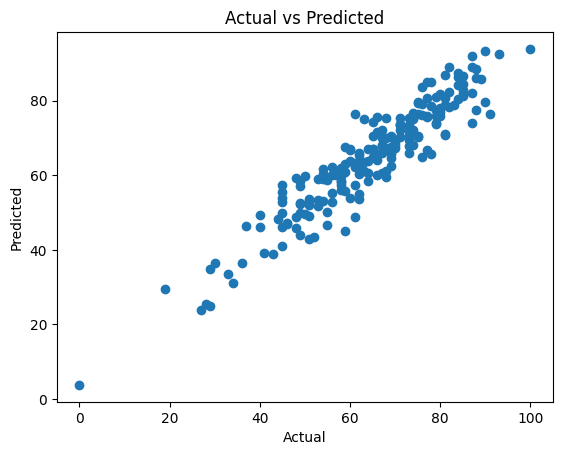

In [28]:
# Plot y_test and y_pred 
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

<Axes: xlabel='math_score'>

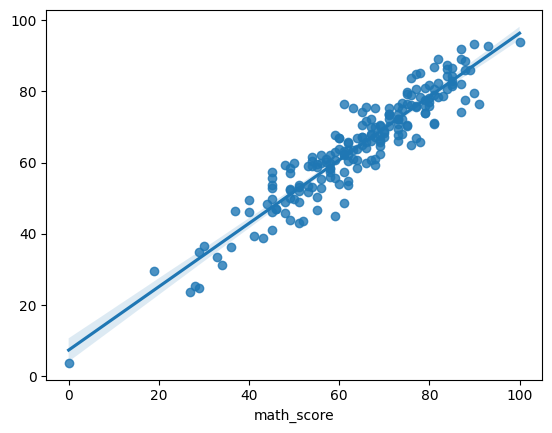

In [33]:
sns.regplot(x=y_test, y=y_pred)

In [34]:

## Difference between actua and predicted values 
pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.976562,-5.976562
740,80,76.875000,3.125000
660,74,76.734375,-2.734375
411,84,87.492188,-3.492188
...,...,...,...
408,52,43.484375,8.515625
332,62,62.000000,0.000000
208,74,68.007812,5.992188
613,65,67.132812,-2.132812
